In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc

In [27]:
wine = pd.read_csv('wine.csv')
wine['Type'] = wine.Type.map({'W':0 , 'R' :1 })
wine.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
y = wine.quality

In [33]:
data = wine.iloc[:, :12].values

In [39]:
centered = data - data.mean(axis = 0)
zscores = centered / data.std(axis = 0)
zscores.shape

(6497, 12)

In [52]:
X = np.stack((np.ones(zscores.shape[0]), zscores[:, 0], zscores[:, 1], zscores[:, 2], zscores[:, 3], zscores[:, 4], zscores[:, 5], zscores[:, 6], zscores[:, 7], zscores[:, 8], zscores[:, 9],zscores[:, 10], zscores[:, 11]), axis=1)

In [53]:
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(b)

[ 5.81837771  0.155642    0.11027401 -0.24568548 -0.00909927  0.29704168
 -0.02652718  0.08762284 -0.07927578 -0.311567    0.08018737  0.10739154
  0.26556038]


In [54]:
# Residuals
ypred = X @ b
residuals = y - ypred

In [55]:
# How much of the variance of y is explained by the model?
# If the relationship is perfect, it's 1 (100%)
R2 = 1 - ypred.var() / y.var()
# The adjusted R2 is corrected for the sample size and number of regressors
adjusted_R2 = 1 - ((1 - R2) * (len(y) - 1) / (len(y) - X.shape[1] - 1))

print(R2*100, adjusted_R2*100)

70.35109898515084 70.29164568988737


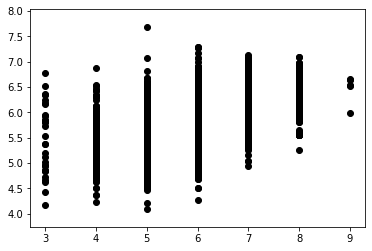

In [67]:
plt.plot(y, ypred, 'ok')
plt.axis('equal')
plt.show()

In [76]:
coef = np.polyfit(y, ypred, deg=1)

curvefit = np.poly1d(coef)

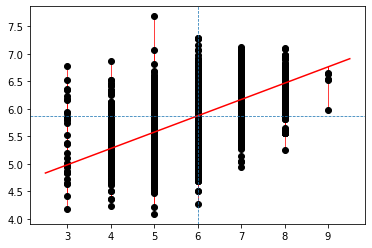

In [77]:
x = np.linspace(2.5, 9.5, 101)
newy = curvefit(x)

# The residuals
segs = np.array(((y, y),(ypred, coef[1] + coef[0]*y ))).T
axes = plt.axes()
axes.add_collection(mc.LineCollection(segs, color="red", linewidths=0.75))

plt.plot(y, ypred, 'ok')
plt.plot(x, newy, '-r', label='curve fit')


plt.axvline(x.mean(), ls='--', lw=0.75)
plt.axhline(newy.mean(), ls='--', lw=0.75)
plt.show()